In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive

train_transaction=pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity=pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
train_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
test_transaction=pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity=pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')

In [5]:
train_transaction.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [6]:
train_identity.columns.tolist()

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [8]:
# 데이터 병합
train=train_transaction.merge(train_identity, how='left',on='TransactionID')
test=test_transaction.merge(test_identity, how='left',on='TransactionID')

In [9]:
object_columns = train.select_dtypes(include=['object']).columns

# 객체 열을 범주 데이터 유형으로 변환
train[object_columns] = train[object_columns].astype('category')

print(train.dtypes)

TransactionID        int64
isFraud              int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
                    ...   
id_36             category
id_37             category
id_38             category
DeviceType        category
DeviceInfo        category
Length: 434, dtype: object


In [10]:
data_types_dict = train.dtypes.to_dict()
print(data_types_dict)

{'TransactionID': dtype('int64'), 'isFraud': dtype('int64'), 'TransactionDT': dtype('int64'), 'TransactionAmt': dtype('float64'), 'ProductCD': CategoricalDtype(categories=['C', 'H', 'R', 'S', 'W'], ordered=False, categories_dtype=object), 'card1': dtype('int64'), 'card2': dtype('float64'), 'card3': dtype('float64'), 'card4': CategoricalDtype(categories=['american express', 'discover', 'mastercard', 'visa'], ordered=False, categories_dtype=object), 'card5': dtype('float64'), 'card6': CategoricalDtype(categories=['charge card', 'credit', 'debit', 'debit or credit'], ordered=False, categories_dtype=object), 'addr1': dtype('float64'), 'addr2': dtype('float64'), 'dist1': dtype('float64'), 'dist2': dtype('float64'), 'P_emaildomain': CategoricalDtype(categories=['aim.com', 'anonymous.com', 'aol.com', 'att.net',
                  'bellsouth.net', 'cableone.net', 'centurylink.net',
                  'cfl.rr.com', 'charter.net', 'comcast.net', 'cox.net',
                  'earthlink.net', 'embar

## XGBoost 모델링

In [10]:
X = train.drop(columns=['isFraud'])
y= train['isFraud']

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 590540 entries, 0 to 590539
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
590540 non-null  int64
dtypes: int64(1)
memory usage: 4.5 MB


In [22]:
unique_values = y.unique()
print(unique_values)

[0 1]


Accuracy: 98.13729806617671


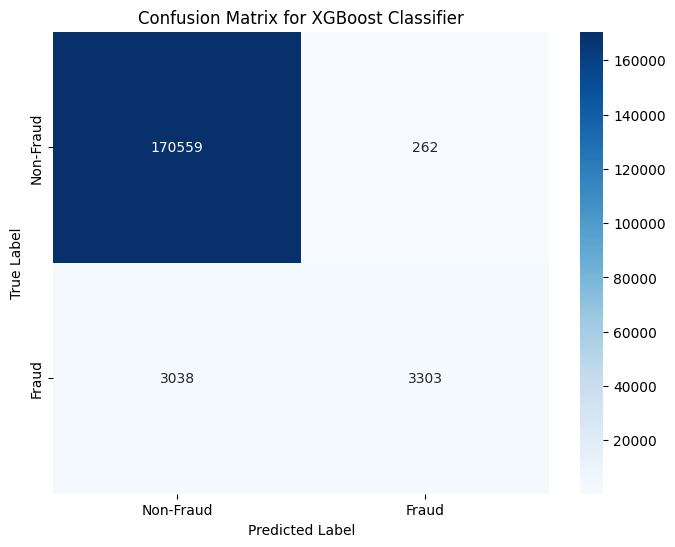

              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.93      0.52      0.67      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162



'\n              precision    recall  f1-score   support\n\n   Non-Fraud       0.98      1.00      0.99    170821\n       Fraud       0.93      0.52      0.67      6341\n\n    accuracy                           0.98    177162\n   macro avg       0.95      0.76      0.83    177162\nweighted avg       0.98      0.98      0.98    177162\n'

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# 모델 훈련
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# 테스트 데이터 예측
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # 확률을 이진 값으로 변환

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy * 100)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_binary)

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# 분류 보고서 출력
report = classification_report(y_test, y_pred_binary, target_names=['Non-Fraud', 'Fraud'])
print(report)



'''
              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.93      0.52      0.67      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162
'''

📌 Accuracy: 98.04698524514286


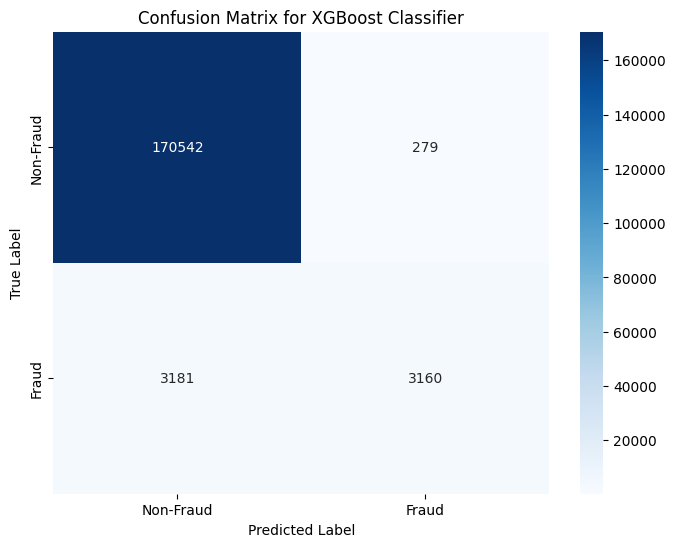


📌 Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.92      0.50      0.65      6341

    accuracy                           0.98    177162
   macro avg       0.95      0.75      0.82    177162
weighted avg       0.98      0.98      0.98    177162

✅ Done! Predictions saved to 'simple_xgboost1.csv'


In [47]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수
X_test_final = test.copy()  # 최종 테스트 데이터 (제출용)

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 6. XGBoost 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# ✅ 7. XGBoost 모델 훈련
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dtest_final = xgb.DMatrix(X_test_final)  # 최종 테스트 데이터

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# ✅ 8. 검증 데이터 예측 (Threshold 0.5)
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # 확률을 이진 값으로 변환

# ✅ 9. 정확도 및 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred_binary)
print("📌 Accuracy:", accuracy * 100)

# ✅ 10. 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# ✅ 11. 분류 보고서 출력
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Non-Fraud', 'Fraud']))

# ✅ 12. 최종 테스트 데이터 예측 (제출용)
test_predictions = xgb_model.predict(dtest_final)

# ✅ 13. 결과 CSV 저장
sample_submission['isFraud'] = test_predictions  # 예측 확률 저장
sample_submission.to_csv('simple_xgboost1.csv', index=False)
print("✅ Done! Predictions saved to 'simple_xgboost1.csv'")


## Fraud 클래스 예측의 정확도 개선을 위한 방법

In [34]:
# 결측치 제거 + SMOTE 적용
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 수치형 & 범주형 데이터 분리
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 결측값 처리
num_imputer = SimpleImputer(strategy='mean')  # 수치형 데이터 평균값으로 채우기
X_train_numeric = pd.DataFrame(num_imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric = pd.DataFrame(num_imputer.transform(X_test[numeric_cols]), columns=numeric_cols)

cat_imputer = SimpleImputer(strategy='most_frequent')  # 범주형 데이터 최빈값으로 채우기
X_train_categorical = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_cols]), columns=categorical_cols)
X_test_categorical = pd.DataFrame(cat_imputer.transform(X_test[categorical_cols]), columns=categorical_cols)

# 범주형 데이터를 라벨 인코딩 (훈련 데이터 기준으로만 변환)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_categorical[col] = le.fit_transform(X_train_categorical[col])

    # 새로운 값이 등장할 경우를 대비해 미리 변환값을 설정
    known_labels = set(le.classes_)  # 훈련 데이터에서 사용한 클래스 저장
    X_test_categorical[col] = X_test_categorical[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # 새로운 값을 포함하도록 LabelEncoder 재적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_test_categorical[col] = le.transform(X_test_categorical[col])

    label_encoders[col] = le  # 필요하면 저장

# 수치형 + 범주형 데이터 결합
X_train_processed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_processed = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# SMOTE 적용 (훈련 데이터에서만)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# XGBoost 모델 훈련
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터 예측 및 평가
y_pred_resampled = xgb_model.predict(X_test_processed)
print(classification_report(y_test, y_pred_resampled))

'''
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.47      0.61      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.74      0.80    177162
weighted avg       0.98      0.98      0.98    177162
'''
# 성능 감소.



              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.47      0.61      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.74      0.80    177162
weighted avg       0.98      0.98      0.98    177162



Accuracy: 93.2970953138935


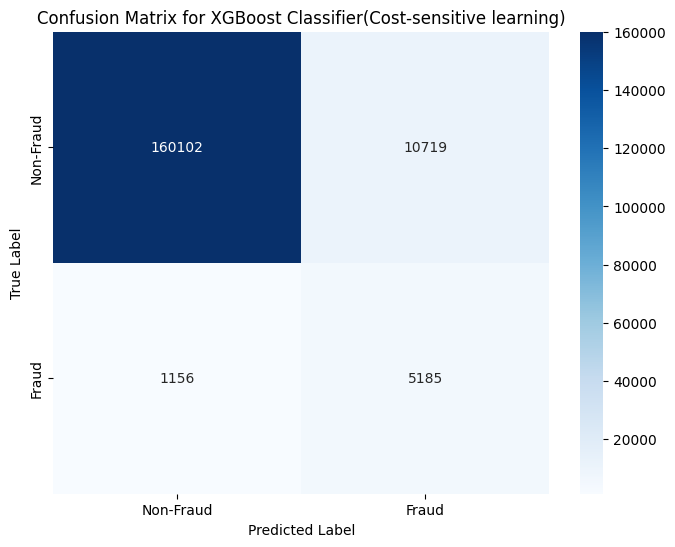

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    170821
           1       0.33      0.82      0.47      6341

    accuracy                           0.93    177162
   macro avg       0.66      0.88      0.72    177162
weighted avg       0.97      0.93      0.95    177162



'\nAccuracy: 93.2970953138935\n              precision    recall  f1-score   support\n\n           0       0.99      0.94      0.96    170821\n           1       0.33      0.82      0.47      6341\n\n    accuracy                           0.93    177162\n   macro avg       0.66      0.88      0.72    177162\nweighted avg       0.97      0.93      0.95    177162\n'

In [30]:
# 비용 민감 모델링 적용
# 소수 클래스에 더 큰 비중 부여
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,
    'verbosity': 0
}

# 모델 훈련 및 평가
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_cost_sensitive = xgb_model.predict(dtest)
y_pred_binary_cost_sensitive = np.where(y_pred_cost_sensitive > 0.5, 1, 0)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_binary_cost_sensitive)
print("Accuracy:", accuracy * 100)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_binary_cost_sensitive)

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier(Cost-sensitive learning)')
plt.show()

# 평가
print(classification_report(y_test, y_pred_binary_cost_sensitive))

'''
Accuracy: 93.2970953138935
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    170821
           1       0.33      0.82      0.47      6341

    accuracy                           0.93    177162
   macro avg       0.66      0.88      0.72    177162
weighted avg       0.97      0.93      0.95    177162
'''


## XGBoost vs. 비용 민감 모델
### 성능개선 분석 결론

🚀 비용 민감 모델이 사기 탐지 성능(Recall)을 크게 개선했으며, 금융 사기 탐지 관점에서 더 효과적

⚠ 정상 거래를 사기로 잘못 탐지하는 비율(**False** Positive)이 높아졌으므로 Threshold 조정이 필요

📌 사기 탐지 목적이라면 비용 민감 모델을 유지하고, Threshold 최적화 및 추가 피처 엔지니어링을 진행하면 더 개선 가능!

## 추가 개선

### Threshold 조정하여 False Positive 줄이기

Optimal Threshold: 0.5400
Accuracy: 94.26174913356137


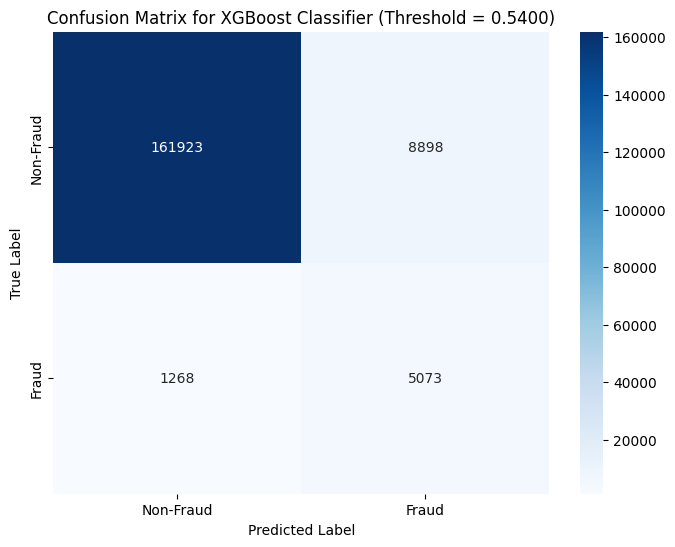


Updated Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    170821
           1       0.36      0.80      0.50      6341

    accuracy                           0.94    177162
   macro avg       0.68      0.87      0.73    177162
weighted avg       0.97      0.94      0.95    177162



In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report

# ✅ Booster 모델에서 확률값 가져오기 (predict() 사용)
y_probs = xgb_model.predict(dtest)  # 사기(1)일 확률값 반환 (0~1 사이 값)

# ✅ Precision-Recall Curve 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# ✅ 최적의 Threshold 찾기 (Recall ≥ 80%이면서 가장 높은 Precision을 가지는 값)
idx = np.where(recalls >= 0.8)[0]  # Recall이 80% 이상인 인덱스 찾기
if len(idx) > 0:
    best_idx = idx[np.argmax(precisions[idx])]  # 그중 Precision이 가장 높은 인덱스 선택
    best_threshold = thresholds[best_idx]
else:
    best_threshold = 0.5  # Default 값 (Recall 80% 이상을 만족하는 Threshold가 없을 경우)

print(f"Optimal Threshold: {best_threshold:.4f}")

# ✅ 새로운 임계값 적용하여 예측값 변환
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# ✅ 정확도 계산
accuracy = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy:", accuracy * 100)

# ✅ 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_adjusted)

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for XGBoost Classifier (Threshold = {best_threshold:.4f})')
plt.show()

# ✅ 평가
print("\nUpdated Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


### 🎯 결론: 임계값 조정이 효과적인가?
✔ Yes!

📌 False Positive(정상 거래를 사기로 잘못 예측) 개수가 감소하여 Precision이 개선됨

📌 Recall이 약간 낮아졌지만, Precision-Recall 균형을 맞추는 과정에서 발생하는 필연적인 트레이드오프

📌 정확도가 증가하면서 더 신뢰할 수 있는 모델이 됨

🚀 결론적으로, 비용 민감 모델 + 임계값 조정을 적용한 모델이 더 나은 선택!

📌 하지만, 비즈니스 요구 사항에 따라 Precision vs. Recall의 균형을 조정할 필요가 있음



### Stacking (XGBoost + 랜덤 포레스트 + 비용 민감)

Accuracy: 98.03851841817094

📌 Stacking Model Performance with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.53      0.66      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.76      0.83    177162
weighted avg       0.98      0.98      0.98    177162



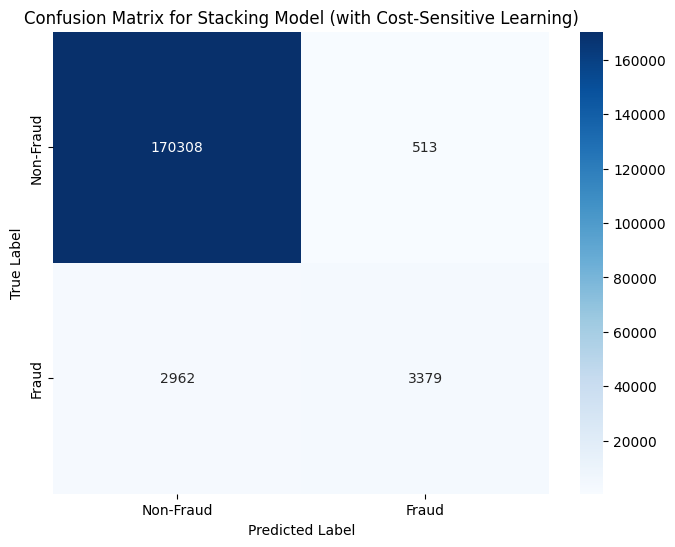

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# ✅ 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 범주형 데이터 처리 (Label Encoding)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # 범주형 컬럼 선택
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # 훈련 데이터 인코딩

    # ✅ 검증 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    X_val[col] = X_val[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_val[col] = le.transform(X_val[col])

    label_encoders[col] = le  # 인코더 저장

# ✅ 비용 민감 XGBoost 모델 설정
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # 비용 민감 모델 적용
    'verbosity': 0
}

# ✅ XGBoost 모델 학습 (비용 민감 모델 적용)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ✅ 비용 민감 랜덤 포레스트 모델 학습 (`class_weight='balanced'` 적용)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# ✅ Base Models의 예측 결과 생성 (확률 값 사용)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost 확률 예측 (훈련 데이터)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost 확률 예측 (검증 데이터)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # 랜덤 포레스트 확률 예측 (훈련 데이터)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # 랜덤 포레스트 확률 예측 (검증 데이터)

# ✅ Stacking을 위한 새로운 Feature 데이터 생성
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # 훈련 데이터
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # 검증 데이터

# ✅ 비용 민감 로지스틱 회귀 (메타 모델) 학습 (`class_weight='balanced'` 적용)
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(stacked_train, y_train)

# ✅ 최종 예측 수행
y_pred_stacked = meta_model.predict(stacked_val)

# ✅ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_stacked)
print("Accuracy:", accuracy * 100)

# ✅ 성능 평가
print("\n📌 Stacking Model Performance with Cost-Sensitive Learning:")
print(classification_report(y_val, y_pred_stacked))

# ✅ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_stacked)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model (with Cost-Sensitive Learning)')
plt.show()

Accuracy: 98.05601652724624

📌 Stacking Model Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.90      0.51      0.65      6341

    accuracy                           0.98    177162
   macro avg       0.94      0.76      0.82    177162
weighted avg       0.98      0.98      0.98    177162



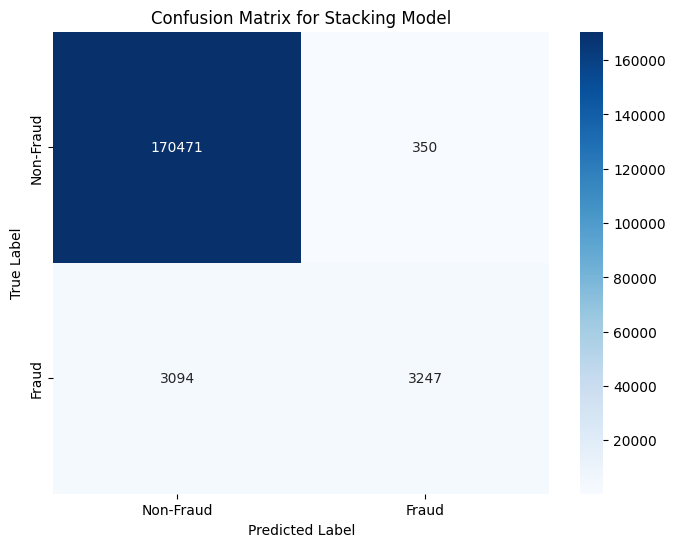

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# ✅ 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 범주형 데이터 처리 (Label Encoding)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # 범주형 컬럼 선택
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # 훈련 데이터 인코딩

    # ✅ 검증 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    X_val[col] = X_val[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_val[col] = le.transform(X_val[col])

    label_encoders[col] = le  # 인코더 저장

# ✅ 비용 민감 XGBoost 모델 설정
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,
    'verbosity': 0
}

# ✅ XGBoost 모델 학습
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ✅ 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Base Models의 예측 결과 생성 (확률 값 사용)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost 확률 예측 (훈련 데이터)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost 확률 예측 (검증 데이터)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # 랜덤 포레스트 확률 예측 (훈련 데이터)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # 랜덤 포레스트 확률 예측 (검증 데이터)

# ✅ Stacking을 위한 새로운 Feature 데이터 생성
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # 훈련 데이터
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # 검증 데이터

# ✅ Meta Model (최종 모델) 학습 (로지스틱 회귀 사용)
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train)

# ✅ 최종 예측 수행
y_pred_stacked = meta_model.predict(stacked_val)

# ✅ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_stacked)
print("Accuracy:", accuracy * 100)

# ✅ 성능 평가
print("\n📌 Stacking Model Performance:")
print(classification_report(y_val, y_pred_stacked))

# ✅ 혼동 행렬 출력
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred_stacked)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

📌 Accuracy: 92.45436380262133


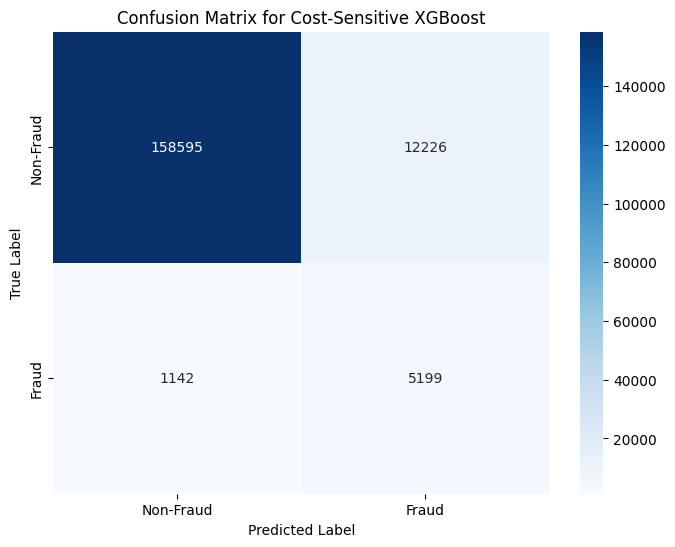


📌 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    170821
           1       0.30      0.82      0.44      6341

    accuracy                           0.92    177162
   macro avg       0.65      0.87      0.70    177162
weighted avg       0.97      0.92      0.94    177162

✅ Done! Predictions saved to 'simple_xgboost.csv'


In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding + Unknown 값 처리)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 검증 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 6. 비용 민감 모델링 (소수 클래스에 더 큰 비중 부여)
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # 비용 민감 모델 적용
    'verbosity': 0
}

# ✅ 7. XGBoost 모델 훈련
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dtest_final = xgb.DMatrix(test)  # 테스트 데이터 (제출용)

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# ✅ 8. 검증 데이터 예측 (Threshold 0.5)
y_pred = xgb_model.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # 확률을 이진 값으로 변환

# ✅ 9. 정확도 및 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred_binary)
print("📌 Accuracy:", accuracy * 100)

# ✅ 10. 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cost-Sensitive XGBoost')
plt.show()

# ✅ 11. 분류 보고서 출력
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ✅ 12. 최종 테스트 데이터 예측 (제출용)
test_predictions = xgb_model.predict(dtest_final)

# ✅ 13. 결과 CSV 저장
sample_submission['isFraud'] = test_predictions  # 예측 확률 저장
sample_submission.to_csv('simple_xgboost.csv', index=False)
print("✅ Done! Predictions saved to 'simple_xgboost.csv'")


📌 Accuracy: 98.05545207211479

📌 Stacking Model Performance with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.87      0.54      0.66      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.77      0.83    177162
weighted avg       0.98      0.98      0.98    177162



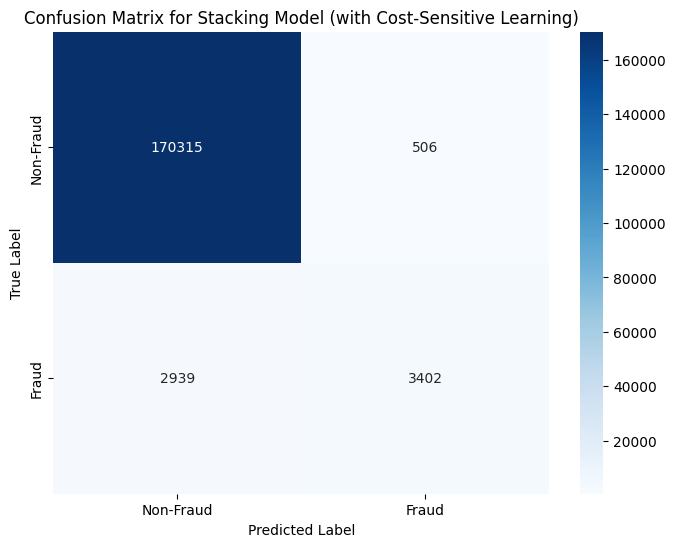

✅ Done! Predictions saved to 'stacking_xgboost_rf.csv'


In [46]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding + Unknown 값 처리)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수
X_test_final = test.copy()  # 최종 테스트 데이터 (제출용)

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 6. 비용 민감 모델링 (소수 클래스에 더 큰 비중 부여)
class_weights = (y_train.size - np.sum(y_train)) / np.sum(y_train)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights,  # 비용 민감 모델 적용
    'verbosity': 0
}

# ✅ 7. XGBoost 모델 훈련 (비용 민감 모델 적용)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest_final = xgb.DMatrix(X_test_final)  # 최종 테스트 데이터

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# ✅ 8. 비용 민감 랜덤 포레스트 모델 학습 (`class_weight='balanced'` 적용)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# ✅ 9. Base Models의 예측 결과 생성 (확률 값 사용)
xgb_train_prob = xgb_model.predict(dtrain)  # XGBoost 확률 예측 (훈련 데이터)
xgb_val_prob = xgb_model.predict(dval)  # XGBoost 확률 예측 (검증 데이터)
xgb_test_prob = xgb_model.predict(dtest_final)  # XGBoost 확률 예측 (테스트 데이터)

rf_train_prob = rf_model.predict_proba(X_train)[:, 1]  # 랜덤 포레스트 확률 예측 (훈련 데이터)
rf_val_prob = rf_model.predict_proba(X_val)[:, 1]  # 랜덤 포레스트 확률 예측 (검증 데이터)
rf_test_prob = rf_model.predict_proba(X_test_final)[:, 1]  # 랜덤 포레스트 확률 예측 (테스트 데이터)

# ✅ 10. Stacking을 위한 새로운 Feature 데이터 생성
stacked_train = np.column_stack((xgb_train_prob, rf_train_prob))  # 훈련 데이터
stacked_val = np.column_stack((xgb_val_prob, rf_val_prob))  # 검증 데이터
stacked_test = np.column_stack((xgb_test_prob, rf_test_prob))  # 테스트 데이터

# ✅ 11. 비용 민감 로지스틱 회귀 (메타 모델) 학습 (`class_weight='balanced'` 적용)
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(stacked_train, y_train)

# ✅ 12. 최종 예측 수행 (검증 데이터 & 테스트 데이터)
y_pred_stacked = meta_model.predict(stacked_val)
test_pred_stacked = meta_model.predict_proba(stacked_test)[:, 1]  # 확률 값 저장

# ✅ 13. 정확도 계산
accuracy = accuracy_score(y_val, y_pred_stacked)
print("📌 Accuracy:", accuracy * 100)

# ✅ 14. 성능 평가
print("\n📌 Stacking Model Performance with Cost-Sensitive Learning:")
print(classification_report(y_val, y_pred_stacked))

# ✅ 15. 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_stacked)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model (with Cost-Sensitive Learning)')
plt.show()

# ✅ 16. 최종 테스트 데이터 예측 (제출용)
sample_submission['isFraud'] = test_pred_stacked  # 예측 확률 저장

# ✅ 17. 결과 CSV 저장
sample_submission.to_csv('stacking_xgboost_rf.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgboost_rf.csv'")


In [49]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.8 MB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수
X_test_final = test.copy()  # 최종 테스트 데이터 (제출용)

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. Feature Scaling (신경망을 위한 StandardScaler 적용)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ✅ 7. Gradient Boosting 모델 학습 (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ✅ 8. 모델 훈련
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ✅ 9. Neural Network Model (MLP 신경망)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ 10. 신경망 훈련
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=512, validation_data=(X_val_scaled, y_val))

# ✅ 11. Stacking Model (XGBoost + LGBM + CatBoost + Neural Network)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X_train, y_train)

# ✅ 12. 검증 데이터 예측
y_pred = stacking_model.predict(X_val)

# ✅ 13. 평가 지표 출력
accuracy = accuracy_score(y_val, y_pred)
print("📌 Stacking Model Accuracy:", accuracy * 100)
print("\n📌 Classification Report:")
print(classification_report(y_val, y_pred))

# ✅ 14. 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ✅ 15. 최종 예측 (테스트 데이터)
test_pred_xgb = xgb_model.predict_proba(X_test_final)[:, 1]
test_pred_lgb = lgb_model.predict_proba(X_test_final)[:, 1]
test_pred_cb = cb_model.predict_proba(X_test_final)[:, 1]

# ✅ 16. 평균 앙상블
test_pred_final = (test_pred_xgb + test_pred_lgb + test_pred_cb) / 3

# ✅ 17. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_nn.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'")


[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.404797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39346
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9654 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 2/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9651 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 3/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9655 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 4/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9653 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 5/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9647 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 6/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9651 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 7/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9657 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 8/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9651 - loss: nan - val_accuracy: 0.9641 - val_loss: nan
Epoch 9/10
923/923 ━━━━━

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.435191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38561
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Stacking Model Accuracy: 96.3795847868053

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113866
           1       0.11      0.00      0.00      4242

    accuracy                           0.96    118108
   macro avg       0.54      0.50      0.49    118108
weighted avg       0.93      0.96      0.95    118108



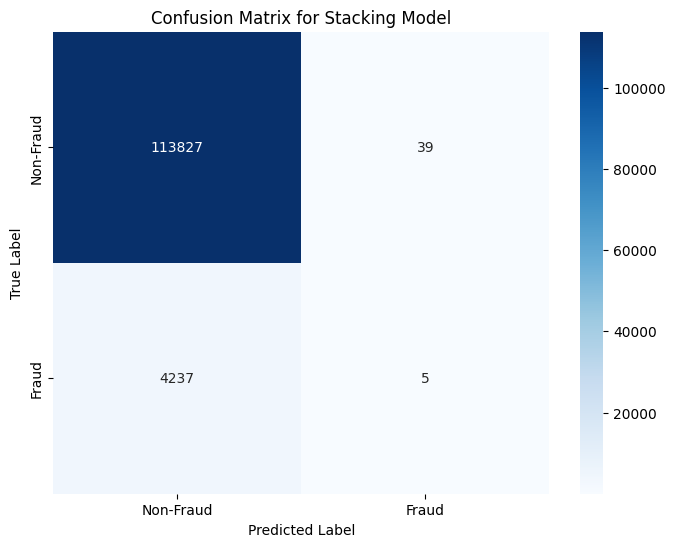

✅ Done! Predictions saved to 'stacking_xgb_lgb_cb.csv'


In [51]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수
X_test_final = test.copy()  # 최종 테스트 데이터 (제출용)

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. Feature Scaling & 결측치 처리
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ✅ 7. Gradient Boosting 모델 학습 (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ✅ 8. 모델 훈련
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ✅ 9. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# ✅ 10. Stacking 모델 훈련
stacking_model.fit(X_train, y_train)

# ✅ 11. 검증 데이터 예측
y_pred = stacking_model.predict(X_val)

# ✅ 12. 평가 지표 출력
accuracy = accuracy_score(y_val, y_pred)
print("📌 Stacking Model Accuracy:", accuracy * 100)
print("\n📌 Classification Report:")
print(classification_report(y_val, y_pred))

# ✅ 13. 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ✅ 14. 최종 테스트 데이터 예측 (Stacking 모델 사용)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ✅ 15. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgb_lgb_cb.csv'")


[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.440916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38561
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9687 - loss: 0.1333 - val_accuracy: 0.9717 - val_loss: 0.1025
Epoch 2/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9727 - loss: 0.1026 - val_accuracy: 0.9733 - val_loss: 0.0983
Epoch 3/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9735 - loss: 0.0983 - val_accuracy: 0.9741 - val_loss: 0.0942
Epoch 4/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9746 - loss: 0.0945 - val_accuracy: 0.9747 - val_loss: 0.0957
Epoch 5/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9754 - loss: 0.0915 - val_accuracy: 0.9756 - val_loss: 0.0966
Epoch 6/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9760 - loss: 0.0892 - val_accuracy: 0.9762 - val_loss: 0.0900
Epoch 7/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9763 - loss: 0.0878 - val_accuracy: 0.9766 - val_loss: 0.0900
Epoch 8/10
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9773 - loss: 0.0849 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Stacking Model Accuracy: 96.3795847868053

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113866
           1       0.11      0.00      0.00      4242

    accuracy                           0.96    118108
   macro avg       0.54      0.50      0.49    118108
weighted avg       0.93      0.96      0.95    118108



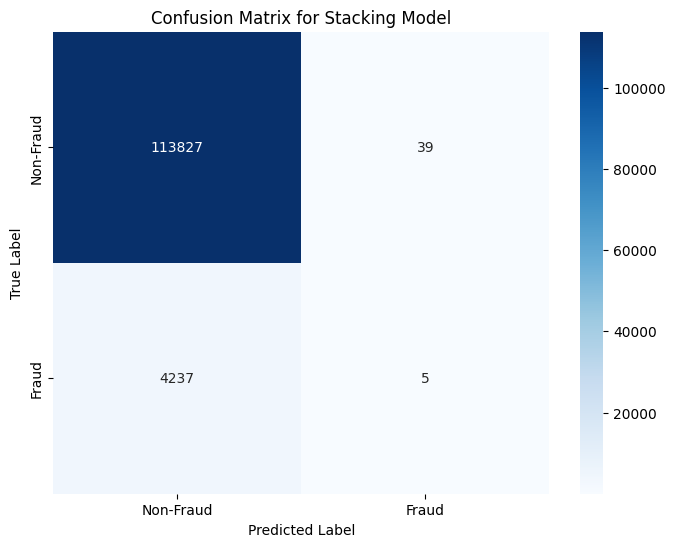

✅ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'


In [52]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 인코딩
    train[col] = le.fit_transform(train[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나올 경우 'Unknown'으로 처리
    known_labels = set(le.classes_)
    test[col] = test[col].apply(lambda x: x if x in known_labels else 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))

    label_encoders[col] = le  # 인코더 저장

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])  # Feature 데이터
y = train['isFraud']  # Target 변수
X_test_final = test.copy()  # 최종 테스트 데이터 (제출용)

# ✅ 5. 데이터 분할 (훈련 데이터 & 검증 데이터)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. Feature Scaling & 결측치 처리
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# ✅ 7. Gradient Boosting 모델 학습 (XGBoost + LGBM + CatBoost)
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=0)

# ✅ 8. 모델 훈련
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# ✅ 9. Neural Network Model (MLP 신경망)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ 10. 신경망 훈련
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=512, validation_data=(X_val_scaled, y_val))

# ✅ 11. Stacking Model (XGBoost + LGBM + CatBoost + Neural Network)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# ✅ 12. Stacking 모델 훈련
stacking_model.fit(X_train, y_train)

# ✅ 13. 검증 데이터 예측
y_pred = stacking_model.predict(X_val)

# ✅ 14. 평가 지표 출력
accuracy = accuracy_score(y_val, y_pred)
print("📌 Stacking Model Accuracy:", accuracy * 100)
print("\n📌 Classification Report:")
print(classification_report(y_val, y_pred))

# ✅ 15. 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# ✅ 16. 최종 테스트 데이터 예측 (Stacking 모델 사용)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ✅ 17. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_nn.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgb_lgb_cb_nn.csv'")


In [3]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.8 MB/s eta 0:00:00


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.6 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 2. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 3. 범주형 데이터 처리 (Label Encoding)
object_columns = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    le.classes_ = np.append(le.classes_, 'Unknown')
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

# ✅ 4. Feature & Target 분리
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ✅ 5. 결측치 처리 & Feature Scaling
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_final = scaler.transform(X_test_final)

# ✅ 6. K-Fold Cross Validation 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ 7. Optuna를 사용한 하이퍼파라미터 최적화
def objective(trial):
    params_xgb_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }

    params_cb = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10)
    }

    xgb_model = xgb.XGBClassifier(**params_xgb_lgb, eval_metric="logloss")
    lgb_model = lgb.LGBMClassifier(**params_xgb_lgb, metric="binary_logloss")
    cb_model = cb.CatBoostClassifier(**params_cb, verbose=0)

    scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        xgb_model.fit(X_train, y_train)
        lgb_model.fit(X_train, y_train)
        cb_model.fit(X_train, y_train)

        preds = (xgb_model.predict_proba(X_val)[:, 1] +
                 lgb_model.predict_proba(X_val)[:, 1] +
                 cb_model.predict_proba(X_val)[:, 1]) / 3
        score = accuracy_score(y_val, preds.round())
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb_lgb = {k: v for k, v in study.best_params.items() if k in ['n_estimators', 'learning_rate', 'max_depth', 'subsample', 'colsample_bytree']}
best_params_cb = {k: v for k, v in study.best_params.items() if k in ['iterations', 'learning_rate', 'depth']}
print("📌 Best Hyperparameters (XGB & LGBM):", best_params_xgb_lgb)
print("📌 Best Hyperparameters (CatBoost):", best_params_cb)

# ✅ 8. 최적화된 모델 학습
xgb_model = xgb.XGBClassifier(**best_params_xgb_lgb, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(**best_params_xgb_lgb, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(**best_params_cb, verbose=0)

xgb_model.fit(X, y)
lgb_model.fit(X, y)
cb_model.fit(X, y)

# ✅ 9. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X, y)

# ✅ 10. 최종 예측 (테스트 데이터)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ✅ 11. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_optuna_kfold_fixed.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgb_lgb_cb_optuna_kfold_fixed.csv'")


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_recall_curve
# :로켓: Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)
# :로켓: 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# + 전처리
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드 (로컬 파일 유지)
train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

# ✅ 2. 컬럼 이름 변환 (특수 문자 제거)
train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 3. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 4. 전처리1: 70% 이상이 결측치인 컬럼 제거
null_percent = train.isnull().mean() * 100
train = train.loc[:, null_percent <= 70]
test = test.loc[:, null_percent <= 70]

# ✅ 5. 전처리2: 남은 결측치는 0으로 대체
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# ✅ 6. 전처리3: Label Encoding 적용
label_encoder = LabelEncoder()
train = train.map(lambda x: str(x) if isinstance(x, (int, float)) else x)
test = test.map(lambda x: str(x) if isinstance(x, (int, float)) else x)

object_columns = train.select_dtypes(include=['object']).columns
for col in object_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = test[col].apply(lambda x: x if x in label_encoder.classes_ else 'Unknown')
    label_encoder.classes_ = np.append(label_encoder.classes_, 'Unknown')
    test[col] = label_encoder.transform(test[col])

# ✅ 7. 전처리4: Standard Scaling 적용
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# ✅ 8. Feature & Target 분리
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ✅ 9. K-Fold Cross Validation 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ 10. Optuna를 사용한 하이퍼파라미터 최적화
def objective(trial):
    params_xgb_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }

    params_cb = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10)
    }

    xgb_model = xgb.XGBClassifier(**params_xgb_lgb, eval_metric="logloss")
    lgb_model = lgb.LGBMClassifier(**params_xgb_lgb, metric="binary_logloss")
    cb_model = cb.CatBoostClassifier(**params_cb, verbose=0)

    scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        xgb_model.fit(X_train, y_train)
        lgb_model.fit(X_train, y_train)
        cb_model.fit(X_train, y_train)

        preds = (xgb_model.predict_proba(X_val)[:, 1] +
                 lgb_model.predict_proba(X_val)[:, 1] +
                 cb_model.predict_proba(X_val)[:, 1]) / 3
        score = accuracy_score(y_val, preds.round())
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb_lgb = {k: v for k, v in study.best_params.items() if k in ['n_estimators', 'learning_rate', 'max_depth', 'subsample', 'colsample_bytree']}
best_params_cb = {k: v for k, v in study.best_params.items() if k in ['iterations', 'learning_rate', 'depth']}
print("📌 Best Hyperparameters (XGB & LGBM):", best_params_xgb_lgb)
print("📌 Best Hyperparameters (CatBoost):", best_params_cb)

# ✅ 11. 최적화된 모델 학습
xgb_model = xgb.XGBClassifier(**best_params_xgb_lgb, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(**best_params_xgb_lgb, metric="binary_logloss")
cb_model = cb.CatBoostClassifier(**best_params_cb, verbose=0)

xgb_model.fit(X, y)
lgb_model.fit(X, y)
cb_model.fit(X, y)

# ✅ 12. Stacking Model (XGBoost + LGBM + CatBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

stacking_model.fit(X, y)

# ✅ 13. 최종 예측 (테스트 데이터)
test_pred_final = stacking_model.predict_proba(X_test_final)[:, 1]

# ✅ 14. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('stacking_xgb_lgb_cb_optuna_kfold_final.csv', index=False)
print("✅ Done! Predictions saved to 'stacking_xgb_lgb_cb_optuna_kfold_final.csv'")


In [10]:
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ✅ 1. 데이터 로드
#train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
#train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
#test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
#test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
#sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

# ✅ 2. 컬럼 이름 변환
train_transaction.columns = [col.replace('-', '_') for col in train_transaction.columns]
test_transaction.columns  = [col.replace('-', '_') for col in test_transaction.columns]
train_identity.columns     = [col.replace('-', '_') for col in train_identity.columns]
test_identity.columns      = [col.replace('-', '_') for col in test_identity.columns]

# ✅ 3. 데이터 병합
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 4. 전처리: 70% 이상 결측치 제거 & 남은 결측치는 0으로 대체
null_percent = train.isnull().mean() * 100
train = train.loc[:, null_percent <= 70]
test = test.loc[:, null_percent <= 70]

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# ✅ 5. Feature & Target 분리
X = train.drop(columns=['isFraud'])
y = train['isFraud']
X_test_final = test.copy()

# ✅ 6. 범주형 변수(Label Encoding) 최적화
object_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()

    # ✅ 훈련 데이터 Label Encoding 적용
    X[col] = le.fit_transform(X[col].astype(str))

    # ✅ 테스트 데이터에서 새로운 값이 나오면 'Unknown'으로 처리 후 Label Encoding
    X_test_final[col] = np.where(X_test_final[col].astype(str).isin(le.classes_),
                                  X_test_final[col], 'Unknown')

    # ✅ 'Unknown'을 기존 클래스에 추가 후 Label Encoding 적용
    le.classes_ = np.append(le.classes_, 'Unknown')
    X_test_final[col] = le.transform(X_test_final[col].astype(str))

    # ✅ 변환된 LabelEncoder 저장
    label_encoders[col] = le

# ✅ 7. 컬럼 정렬 (불일치 방지)
missing_cols = set(X.columns) - set(X_test_final.columns)
extra_cols = set(X_test_final.columns) - set(X.columns)

# ✅ 테스트 데이터에서 훈련 데이터에 없는 컬럼 제거
X_test_final = X_test_final.drop(columns=extra_cols, errors='ignore')

# ✅ 훈련 데이터에서 테스트 데이터에 없는 컬럼을 추가 (값은 0으로 채움)
for col in missing_cols:
    X_test_final[col] = 0

# ✅ 컬럼 순서 동일하게 맞추기
X_test_final = X_test_final[X.columns]

# ✅ 8. Standard Scaling 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# ✅ 9. K-Fold Cross Validation 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ XGBoost K-Fold 학습 및 예측 저장
xgb_train_meta = np.zeros(X_scaled.shape[0])  # 검증 데이터 확률값 저장
xgb_test_meta = np.zeros(X_test_scaled.shape[0])  # 테스트 데이터 예측값 저장

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled, y)):
    print(f"\n📌 Fold {fold+1}: Training...")

    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    clf = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.6,
        random_state=42,
        tree_method='gpu_hist',
        predictor='gpu_predictor'
    )

    clf.fit(X_train, y_train)

    # 검증 데이터 예측 확률값 저장
    y_val_pred_prob = clf.predict_proba(X_val)[:, 1]
    xgb_train_meta[val_idx] = y_val_pred_prob

    # 테스트 데이터 예측값 평균 계산
    xgb_test_meta += clf.predict_proba(X_test_scaled)[:, 1] / kf.n_splits

    # 검증 데이터의 혼동 행렬 출력
    y_val_pred = np.round(y_val_pred_prob)  # 0 또는 1로 변환
    cm = confusion_matrix(y_val, y_val_pred)

    print("\n=== Confusion Matrix (XGBoost) ===")
    print(cm)
    print(classification_report(y_val, y_val_pred, digits=4))

# ✅ 10. Logistic Regression Stacking 적용 (검증 데이터만 사용)
print("\n📌 Training Logistic Regression for Stacking...")
X_train_meta = xgb_train_meta.reshape(-1, 1)  # 검증 데이터 확률값 사용
X_test_meta = xgb_test_meta.reshape(-1, 1)  # 테스트 데이터 확률값 사용

log_reg = LogisticRegression(C=0.5)
log_reg.fit(X_train_meta, y)

# ✅ 검증 데이터에서 로지스틱 회귀의 예측 수행
y_val_pred_logreg = log_reg.predict(X_train_meta[val_idx].reshape(-1, 1))  # 검증 데이터만 예측

# ✅ 검증 데이터에서 혼동 행렬 출력 (로지스틱 회귀)
cm_logreg = confusion_matrix(y.iloc[val_idx], y_val_pred_logreg)  # 검증 데이터의 실제값과 비교

print("\n📌 Logistic Regression Stacking Performance (Validation Data Only):")
print(f"Accuracy: {accuracy_score(y.iloc[val_idx], y_val_pred_logreg) * 100:.2f}%")
print("Confusion Matrix:")
print(cm_logreg)
print(classification_report(y.iloc[val_idx], y_val_pred_logreg))

# ✅ 11. 최종 예측 (테스트 데이터)
test_pred_final = log_reg.predict_proba(X_test_meta)[:, 1]

# ✅ 12. CSV 저장
sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('xgb_logreg_gpu_optuna_kfold.csv', index=False)
print("✅ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'")



📌 Fold 1: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:38] WARNING: /workspace/src/common/error_ms


=== Confusion Matrix (XGBoost) ===
[[113815    161]
 [  1999   2133]]
              precision    recall  f1-score   support

           0     0.9827    0.9986    0.9906    113976
           1     0.9298    0.5162    0.6639      4132

    accuracy                         0.9817    118108
   macro avg     0.9563    0.7574    0.8272    118108
weighted avg     0.9809    0.9817    0.9792    118108


📌 Fold 2: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113803    173]
 [  2056   2076]]
              precision    recall  f1-score   support

           0     0.9823    0.9985    0.9903    113976
           1     0.9231    0.5024    0.6507      4132

    accuracy                         0.9811    118108
   macro avg     0.9527    0.7505    0.8205    118108
weighted avg     0.9802    0.9811    0.9784    118108


📌 Fold 3: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113798    177]
 [  2002   2131]]
              precision    recall  f1-score   support

           0     0.9827    0.9984    0.9905    113975
           1     0.9233    0.5156    0.6617      4133

    accuracy                         0.9816    118108
   macro avg     0.9530    0.7570    0.8261    118108
weighted avg     0.9806    0.9816    0.9790    118108


📌 Fold 4: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113816    159]
 [  2063   2070]]
              precision    recall  f1-score   support

           0     0.9822    0.9986    0.9903    113975
           1     0.9287    0.5008    0.6507      4133

    accuracy                         0.9812    118108
   macro avg     0.9554    0.7497    0.8205    118108
weighted avg     0.9803    0.9812    0.9784    118108


📌 Fold 5: Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix (XGBoost) ===
[[113798    177]
 [  2123   2010]]
              precision    recall  f1-score   support

           0     0.9817    0.9984    0.9900    113975
           1     0.9191    0.4863    0.6361      4133

    accuracy                         0.9805    118108
   macro avg     0.9504    0.7424    0.8130    118108
weighted avg     0.9795    0.9805    0.9776    118108


📌 Training Logistic Regression for Stacking...

📌 Logistic Regression Stacking Performance (Validation Data Only):
Accuracy: 98.15%
Confusion Matrix:
[[113681    294]
 [  1893   2240]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.88      0.54      0.67      4133

    accuracy                           0.98    118108
   macro avg       0.93      0.77      0.83    118108
weighted avg       0.98      0.98      0.98    118108

✅ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'


#XGBoost + Logistic Regression Stacking + Optuna + K-Fold (5-Fold)
데이터 처리
✅ 결측치 처리

✅ 라벨 인코딩(Label Encoding)

✅ 훈련 데이터와 검증 데이터 분할

XGBoost + Logistic Regression Stacking 적용
✅ XGBoost가 예측한 확률값을 Logistic Regression의 입력으로 사용

✅ XGBoost 단일 모델의 강력한 예측력을 활용하면서, 로지스틱 회귀로 성능 향상

Optuna를 활용한 하이퍼파라미터 최적화
✅ n_estimators, learning_rate, max_depth 등 XGBoost의 핵심 하이퍼파라미터 자동 최적화

✅ 최적의 하이퍼파라미터로 XGBoost 학습 성능 극대화

K-Fold Cross Validation 적용
✅ K-Fold(5-Fold) 적용하여 일반화 성능 향상

✅ 데이터를 5개 Fold로 나누어 XGBoost 모델이 더 잘 학습하도록 함

## XGBoost test 에 합성

In [ ]:
import gc
import numpy as np
import pandas as pd
import optuna
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

#############################
# 1) 데이터 불러오기
#############################
train_transaction = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_transaction.csv")
train_identity = pd.read_csv("/content/drive/MyDrive/ITStudy/data/train_identity.csv")
test_transaction = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/ITStudy/data/test_identity.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ITStudy/data/sample_submission.csv')

#############################
# 2) 컬럼명 치환 ( '-' → '_' )
#############################
for df in [train_transaction, train_identity, test_transaction, test_identity]:
    df.columns = [c.replace('-', '_') for c in df.columns]

#############################
# 3) Train 병합, Test 병합
#############################
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test  = test_transaction.merge(test_identity,   how='left', left_index=True, right_index=True)
del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

#############################
# 4) 타깃 분리
#############################
y_all = train['isFraud'].copy()
X_all = train.drop('isFraud', axis=1)
X_test = test.copy()
del train, test
gc.collect()

#############################
# 5) 결측치 처리
#############################
X_all  = X_all.fillna(-999)
X_test = X_test.fillna(-999)

#############################
# 6) 라벨 인코딩
#############################
for col in X_all.columns:
    if X_all[col].dtype == 'object' or X_test[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(X_all[col].values) + list(X_test[col].values))
        X_all[col]  = le.transform(X_all[col].values)
        X_test[col] = le.transform(X_test[col].values)

#############################
# 7) Train/Validation 분할
#############################
X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

#############################
# 8) Optuna를 활용한 XGBoost 하이퍼파라미터 최적화
#############################
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10, log=True),
        'tree_method': 'gpu_hist',  # ✅ GPU 사용
        'predictor': 'gpu_predictor'
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(**params, eval_metric="logloss")
        model.fit(X_tr, y_tr)

        preds = model.predict(X_v)
        score = accuracy_score(y_v, preds)
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params_xgb = study.best_params
best_params_xgb.update({'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'})

#############################
# 9) K-Fold를 이용한 XGBoost 학습 & 예측 저장
#############################
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_train_meta = np.zeros(X_train.shape[0])  # 검증 데이터 예측 확률값 저장
xgb_val_meta = np.zeros(X_val.shape[0])  # 검증 데이터 예측 확률값 저장
xgb_test_meta = np.zeros(X_test.shape[0])  # 테스트 데이터 예측 확률값 저장

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n📌 Fold {fold+1}: Training...")

    X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    clf = xgb.XGBClassifier(**best_params_xgb, eval_metric="logloss")
    clf.fit(X_tr, y_tr)

    # 검증 데이터 예측 확률값 저장
    xgb_train_meta[val_idx] = clf.predict_proba(X_v)[:, 1]
    xgb_val_meta += clf.predict_proba(X_val)[:, 1] / kf.n_splits  # ✅ 검증 데이터 확률값 저장
    xgb_test_meta += clf.predict_proba(X_test)[:, 1] / kf.n_splits  # ✅ 테스트 데이터 확률값 저장

#############################
# 10) Logistic Regression Stacking 적용
#############################
X_train_meta = xgb_train_meta.reshape(-1, 1)
X_val_meta = xgb_val_meta.reshape(-1, 1)  # ✅ 검증 데이터 확률값 사용
X_test_meta = xgb_test_meta.reshape(-1, 1)

log_reg = LogisticRegression(C=0.5)
log_reg.fit(X_train_meta, y_train)

# ✅ 검증 데이터에서 예측
y_val_pred_logreg = log_reg.predict(X_val_meta)  # ✅ 검증 데이터 예측 수행

# ✅ 검증 데이터의 혼동 행렬 출력
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
print("\n📌 Logistic Regression Stacking Performance (Validation Data Only):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg) * 100:.2f}%")
print("Confusion Matrix:")
print(cm_logreg)
print(classification_report(y_val, y_val_pred_logreg))

#############################
# 11) 최종 예측 (테스트 데이터)
#############################
test_pred_final = log_reg.predict_proba(X_test_meta)[:, 1]

sample_submission['isFraud'] = test_pred_final
sample_submission.to_csv('xgb_logreg_gpu_optuna_kfold.csv', index=False)
print("✅ Done! Predictions saved to 'xgb_logreg_gpu_optuna_kfold.csv'")


In [ ]:
# ✅ 검증 데이터에서 예측 확률값 추출
y_val_proba_logreg = log_reg.predict_proba(X_val_meta)[:, 1]

# ✅ Precision-Recall Curve 출력
precision_xgb, recall_xgb, _ = precision_recall_curve(y_val, xgb_val_meta)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_val, y_val_proba_logreg)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label="XGBoost", linestyle="--", color="blue")
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression Stacking", linestyle="-", color="red")
plt.title("Precision-Recall Curve (Validation)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ✅ 15. 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_val_pred_logreg)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()